In [ ]:
# UKBB cumulative allele frequency

In [18]:
import pandas as pd
import numpy as np

In [1]:
import pandas as pd

df = pd.read_csv('../data/custom/ukbb_gene_caf_500k.txt.bgz',compression='gzip',sep='\t')

In [2]:
df = df[~df.annotation.isna()]

In [3]:
df[df.CAF==0].shape[0] / df.shape[0]

0.0003929273084479371

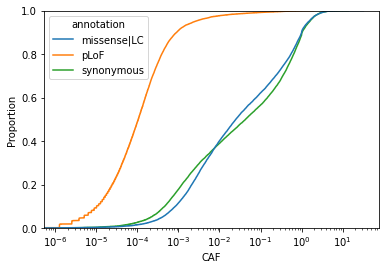

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.ecdfplot(data = df[df.annotation!='pLoF|missense|LC'], x = 'CAF',hue='annotation')
#plt.xlim((0, 0.1))
plt.xscale('log')

In [6]:
iuphar = pd.read_csv('../data/gene_families/iuphar_targets_clean.csv')
df = df.merge(iuphar,left_on='gene_id',right_on='hgnc_symbol', how = 'left')

In [7]:
df['target_class'] = df.target_class.fillna('other')
df[df.annotation=='pLoF'].target_class.value_counts()

other                 15385
enzyme                 1247
transporter             535
gpcr                    344
catalytic_receptor      247
other_protein           211
vgic                    143
lgic                     78
other_ic                 51
nhr                      46
Name: target_class, dtype: int64

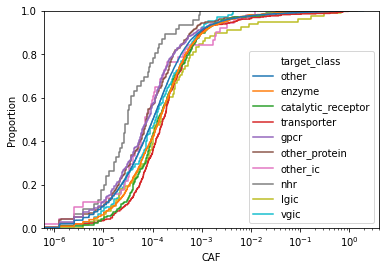

In [8]:
sns.ecdfplot(data = df[df.annotation=='pLoF'], x = 'CAF',hue='target_class')
plt.xscale('log')

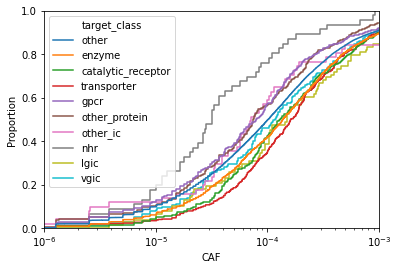

In [9]:
sns.ecdfplot(data = df[df.annotation=='pLoF'], x = 'CAF',hue='target_class')
plt.xlim((10**-6, 10**-3))
plt.xscale('log')

In [29]:
import statsmodels.formula.api as smf

smf.ols('log_CAF ~ target_class', data = df[df.annotation=='pLoF']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_CAF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     12.23
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.67e-19
Time:                        17:17:03   Log-Likelihood:                -22911.
No. Observations:               18287   AIC:                         4.584e+04
Df Residuals:                   18277   BIC:                         4.592e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.8131      0.054    -70.735      0.000      -3.919      -3.707
target_class[T.enzyme]           -0.0422      0.059     -0.714      0.475      -0.158       0.074
target_class[T.gpcr]             -0.2785      0.071     -3.941      0.000      -0.417      -0.140
target_class[T.lgic]              0.1158      0.110      1.052      0.293      -0.100       0.331
target_class[T.nhr]              -0.6426      0.136     -4.723      0.000      -0.909      -0.376
target_class[T.other]            -0.1697      0.054     -3.122      0.002      -0.276      -0.063
target_class[T.other_ic]         -0.2328      0.130     -1.787      0.074      -0.488       0.023
target_class[T.other_protein]    -0.2712      0.079     -3.415      0.001      -0.427      -0.116
target_class[T.transporter]       0.0768      0.065      1.179      0.238      -0.051       0.205
target_class[T.vgic]             -0.1357      0.089     -1.524      0.127      -0.310       0.039
==============================================================================
Omnibus:                     2290.329   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5901.129
Skew:                           0.711   Prob(JB):                         0.00
Kurtosis:                       5.392   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from scipy import stats

print(stats.mannwhitneyu(df[(df.annotation=='pLoF') & (df.target_class=='nhr')].CAF,df[(df.annotation=='pLoF') & (df.target_class=='other')].CAF))
print(stats.mannwhitneyu(df[(df.annotation=='pLoF') & (df.target_class=='gpcr')].CAF,df[(df.annotation=='pLoF') & (df.target_class=='other')].CAF))

MannwhitneyuResult(statistic=226770.0, pvalue=2.5250671870082905e-05)
MannwhitneyuResult(statistic=2402536.5, pvalue=0.00343726059048905)


/home/andrew/miniconda3/envs/variants/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='log_CAF', ylabel='target_class'>

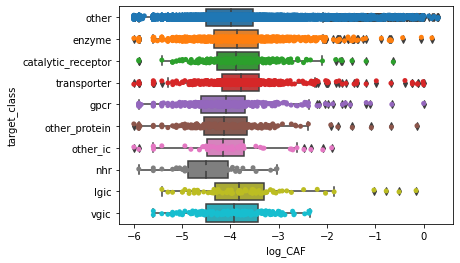

In [22]:
df['log_CAF'] = np.where(df.CAF==0, -6, np.log10(df.CAF))
sns.stripplot(data = df[df.annotation=='pLoF'], x = 'log_CAF',y='target_class')

sns.boxplot(data = df[df.annotation=='pLoF'], x = 'log_CAF',y='target_class')
# plt.xlim((10**-6, 10**-3))
#plt.xscale('log')

/home/andrew/miniconda3/envs/variants/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='log_CAF', ylabel='target_class'>

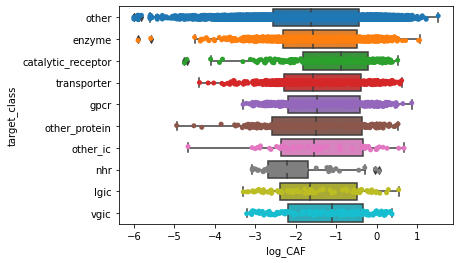

In [23]:
df['log_CAF'] = np.where(df.CAF==0, -6, np.log10(df.CAF))
sns.stripplot(data = df[df.annotation=='missense|LC'], x = 'log_CAF',y='target_class')

sns.boxplot(data = df[df.annotation=='missense|LC'], x = 'log_CAF',y='target_class')
# plt.xlim((10**-6, 10**-3))
#plt.xscale('log')

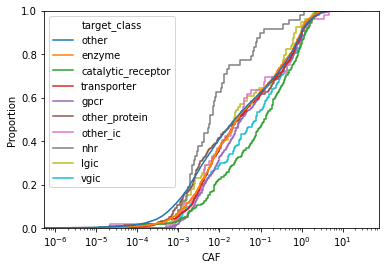

In [ ]:
sns.ecdfplot(data = df[df.annotation=='missense|LC'], x = 'CAF',hue='target_class')
plt.xscale('log')

In [ ]:
df.annotation.value_counts(dropna=False)

pLoF|missense|LC    19442
missense|LC         19400
synonymous          19221
pLoF                18287
NaN                  1289
Name: annotation, dtype: int64